In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AMZN_1min.txt",header=None)

In [ ]:
df.head()

,0,1,2,3,4,5
0,2005-01-03 08:00:00,44.56,45.14,44.56,44.75,2322
1,2005-01-03 08:01:00,45.13,45.30,45.08,45.10,5426
2,2005-01-03 08:02:00,45.30,45.35,45.30,45.35,400
3,2005-01-03 08:03:00,45.35,45.35,45.30,45.35,2000
4,2005-01-03 08:04:00,45.35,45.58,45.30,45.55,3750


In [ ]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns=["Date","Open","High","Low","Close","Volume"]

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df_2022 = df[df['Date'].dt.year == 2022]
df = df_2022[(df_2022['Date'].dt.hour >= 9) & (df_2022['Date'].dt.hour <= 16)]


In [ ]:
df.shape

(16093, 6)

Statistical description of stock prices

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,16093,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000
mean,2022-01-29 21:28:18.015286016,3093.017677,3094.985252,3091.008436,3093.022996,4311.246132
min,2022-01-03 09:01:00,2708.925000,2712.835000,2707.040000,2710.220000,100.000000
25%,2022-01-14 15:02:00,2974.215800,2976.300000,2972.100000,2974.238600,1100.000000
50%,2022-01-31 10:17:00,3127.850000,3129.000000,3126.070000,3127.870000,2245.000000
75%,2022-02-11 12:11:00,3220.190000,3222.110000,3218.140000,3220.640000,4335.000000
max,2022-02-25 16:57:00,3425.975000,3428.000000,3419.200000,3427.120000,449182.000000
std,NaN,169.149077,168.759565,169.575191,169.152109,14235.301909


Visualizing closing price of stocks over time

In [ ]:
start_time = pd.to_datetime('09:00:00').time()
end_time = pd.to_datetime('16:00:00').time()

In [ ]:
def fill_missing(data_frame):
    expected_timestamps = pd.date_range(start=data_frame['Date'].min().replace(hour=start_time.hour, minute=start_time.minute),
                                       end=data_frame['Date'].max().replace(hour=end_time.hour, minute=end_time.minute),
                                       freq='T')
    expected_dates = data_frame['Date'].dt.date.drop_duplicates()

    data_frame.set_index('Date', inplace=True)
    data_frame = data_frame.reindex(expected_timestamps)


    data_frame.interpolate(method='time', inplace=True)

    data_frame.reset_index(inplace=True)

    data_frame = data_frame[(data_frame['index'].dt.time >= start_time) &
                            (data_frame['index'].dt.time <= end_time) &
                            (data_frame['index'].dt.date.isin(expected_dates))]

    data_frame.reset_index(drop=True, inplace=True)  # Reindex the DataFrame
    return data_frame


In [ ]:
df=fill_missing(df)

In [ ]:
df

,index,Open,High,Low,Close,Volume
1,2022-01-03 09:01:00,3353.042000,3353.042000,3353.042000,3353.042000,100.000000
2,2022-01-03 09:02:00,3353.060000,3353.962400,3350.000000,3350.000000,695.000000
3,2022-01-03 09:03:00,3352.716667,3353.468667,3350.166667,3350.166667,595.833333
4,2022-01-03 09:04:00,3352.373333,3352.974933,3350.333333,3350.333333,496.666667
5,2022-01-03 09:05:00,3352.030000,3352.481200,3350.500000,3350.500000,397.500000
...,...,...,...,...,...,...
15993,2022-02-25 15:56:00,3072.470000,3074.390000,3071.010000,3074.027600,6576.000000
15994,2022-02-25 15:57:00,3074.000000,3074.157400,3071.760000,3072.560000,9870.000000
15995,2022-02-25 15:58:00,3073.330000,3075.000000,3072.610000,3074.430000,14548.000000
15996,2022-02-25 15:59:00,3074.720000,3076.710000,3072.660000,3076.710000,34904.000000


Text(0, 0.5, 'Closing Price')

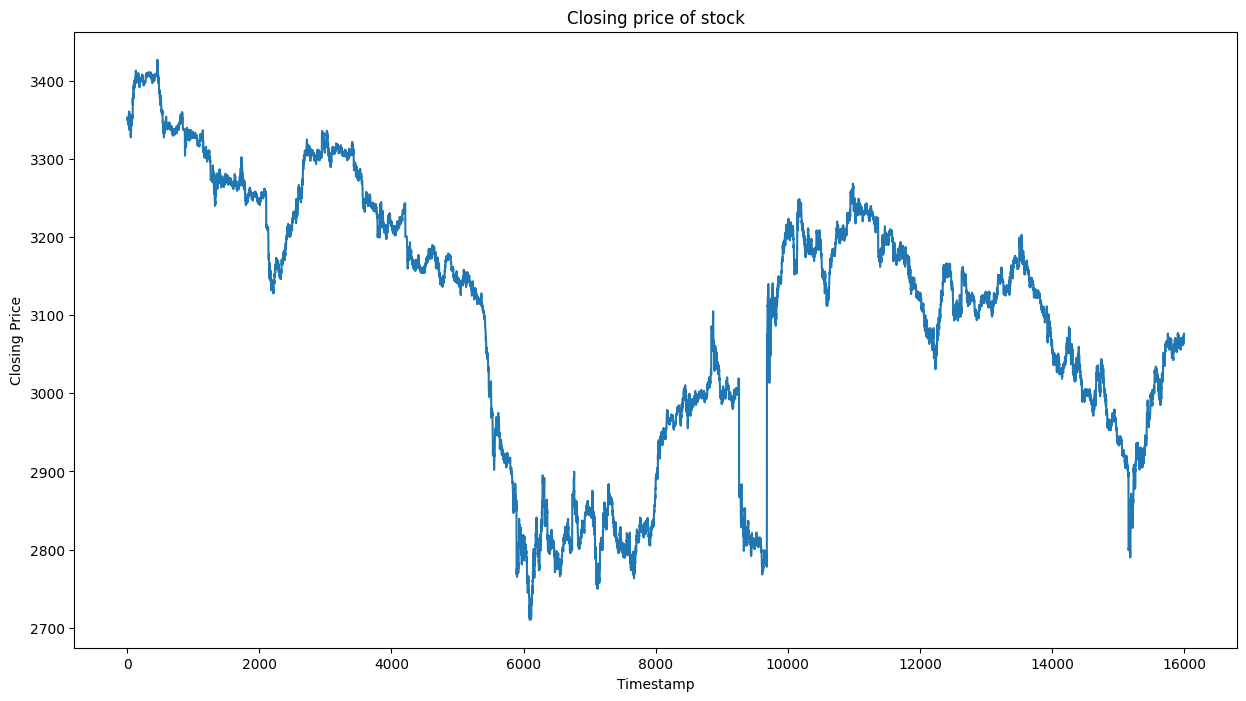

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df["Close"])
plt.title("Closing price of stock")
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")

Visualizing trends in stock prices

Text(0.5, 1.0, 'Trend visualization')

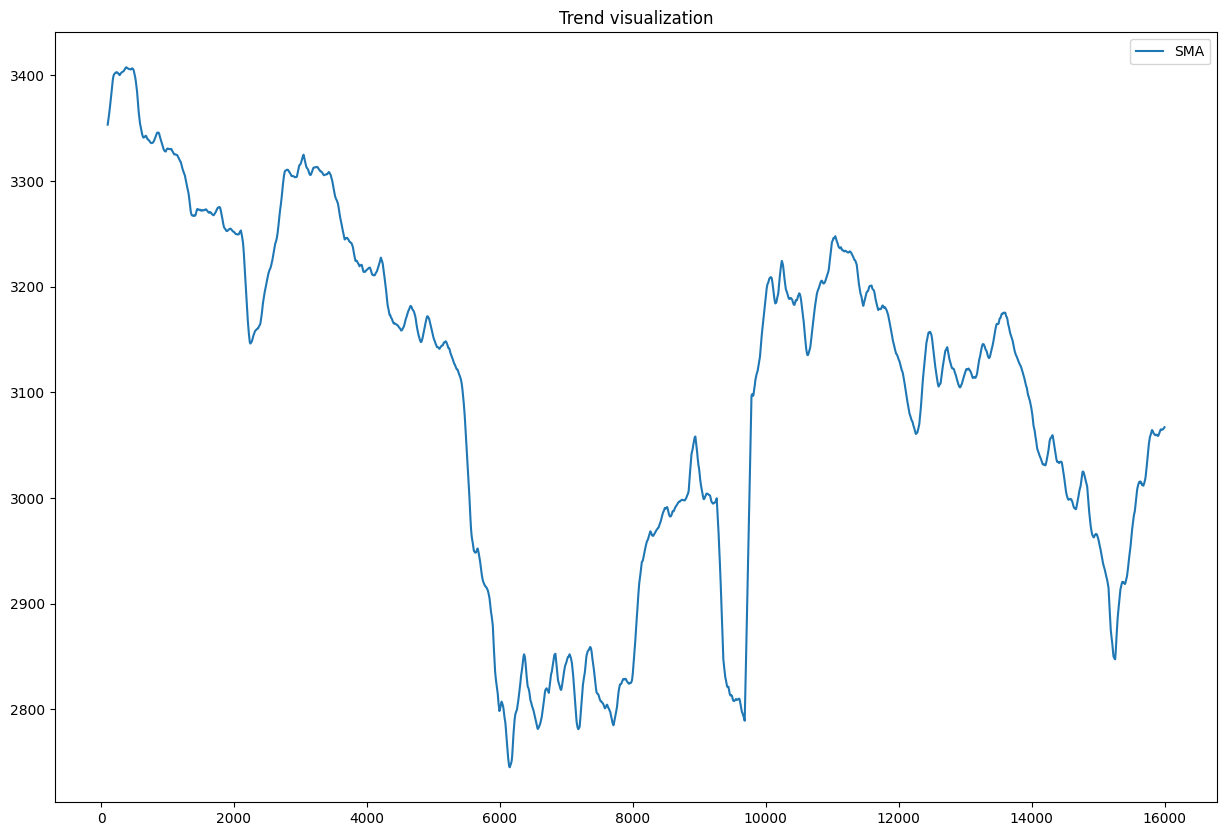

In [ ]:
def simple_moving_average(data,feature,window):

  d= data[feature].rolling(window).mean()
  return d

def exp_moving_average(data,feature,window):
  d=data[feature].ewm(window).mean()
  return d

SMA=simple_moving_average(df,"Close",100)
plt.figure(figsize=(15,10))
plt.plot(SMA,label="SMA")
#plt.plot(df["Close"],label="closing price")
plt.legend()
plt.title("Trend visualization")

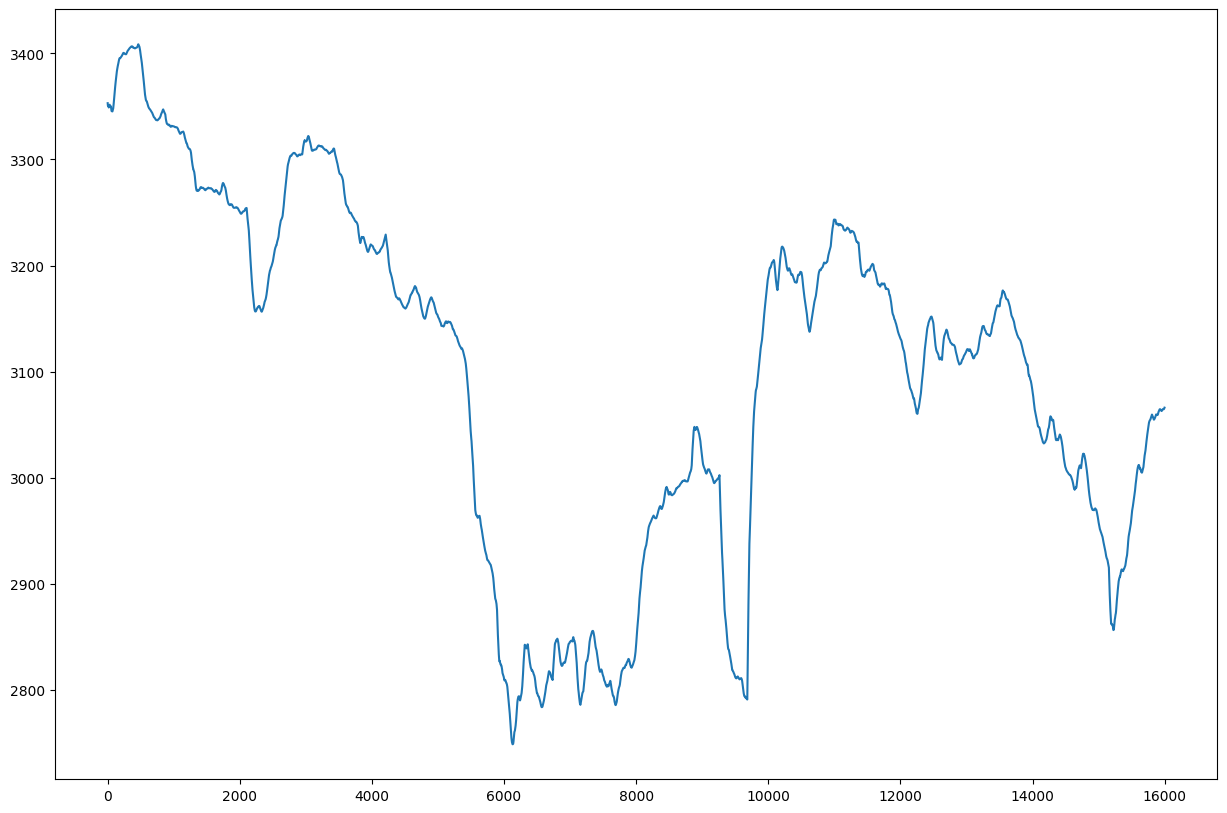

In [ ]:
ema=exp_moving_average(df,"Close",50)
plt.figure(figsize=(15,10))
plt.plot(ema,label="Exp moving average")
#plt.plot(df["Close"],label="Closing price")

<Axes: >

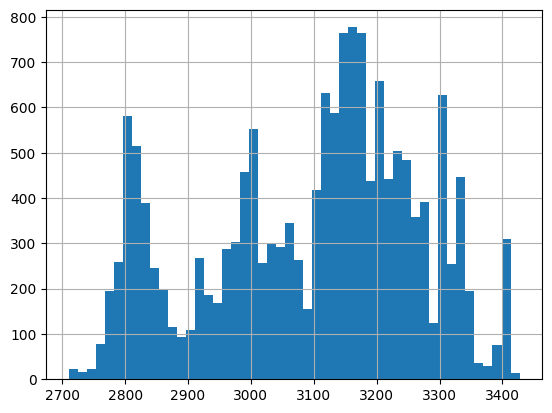

In [ ]:
df["Close"].hist(bins=50)

In [ ]:
df.drop("index",axis=1,inplace=True)

<Axes: >

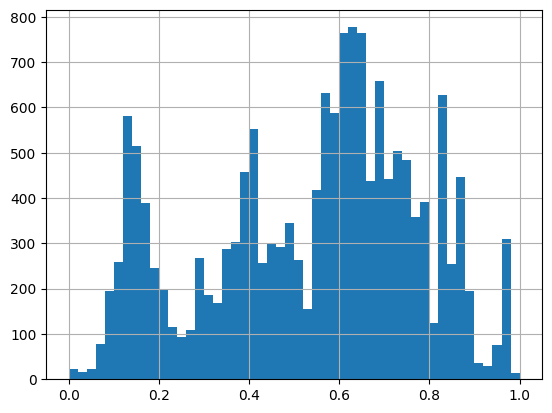

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
normalized=scaler.fit_transform(df)
normalized=pd.DataFrame(normalized)

normalized[3].hist(bins=50)  #creating histogram of normalized data

Now building the LSTM model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
class My_LSTM_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(My_LSTM_Model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM model
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :])

        return out

In [ ]:
def data_loader(stock, look_back, percentage_train_split):

    data_frame = stock.values
    cf = []

    for i in range(stock.shape[0]-look_back):
        cf.append(data_frame[i:look_back+i,:])

    cf = np.array(cf)

    train_set_size = int(percentage_train_split * cf.shape[0])

    # splitting the data
    x_train = cf[:train_set_size, :-1, :]     # extracting trainning set
    y_train = cf[:train_set_size, -1, 3].   # we are predicting closing price only

    x_test = cf[train_set_size:, :-1, :]     # extracting testing set
    y_test = cf[train_set_size:, -1, 3]


    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)

    y_train = torch.from_numpy(y_train).type(torch.Tensor).reshape(-1,1)   # reshaping to make it a column vector
    y_test = torch.from_numpy(y_test).type(torch.Tensor).reshape(-1,1)

    return [x_train, y_train, x_test, y_test]


In [ ]:
#Hyperparameters for the LSTM model
input_dim=5
hidden_dim=20
num_layers=2
output_dim=1
lr=0.02
span=20

In [ ]:
x_train, y_train, x_test, y_test = data_loader(normalized, span, 0.7)

x_train shape:  torch.Size([11185, 18, 5])
y_train shape:  torch.Size([11185, 1])
x_test shape:  torch.Size([4793, 18, 5])
y_test shape:  torch.Size([4793, 1])


In [ ]:
import torch.optim as optim

model = My_LSTM_Model(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=output_dim)

loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=lr)

num_epochs = 100
hist = np.zeros(num_epochs)

seq_dim =span-1
for t in range(num_epochs):

    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)


    print("Epoch ", t+1, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  1 MSE:  0.4227275252342224
Epoch  2 MSE:  0.18648262321949005
Epoch  3 MSE:  0.04598776251077652
Epoch  4 MSE:  0.2120739072561264
Epoch  5 MSE:  0.07925928384065628
Epoch  6 MSE:  0.04222998023033142
Epoch  7 MSE:  0.06872584670782089
Epoch  8 MSE:  0.08493294566869736
Epoch  9 MSE:  0.07950574904680252
Epoch  10 MSE:  0.060876596719026566
Epoch  11 MSE:  0.03993554413318634
Epoch  12 MSE:  0.026082120835781097
Epoch  13 MSE:  0.02348441630601883
Epoch  14 MSE:  0.027079978957772255
Epoch  15 MSE:  0.026012517511844635
Epoch  16 MSE:  0.017929157242178917
Epoch  17 MSE:  0.012504673562943935
Epoch  18 MSE:  0.011449374258518219
Epoch  19 MSE:  0.01187297236174345
Epoch  20 MSE:  0.010684968903660774
Epoch  21 MSE:  0.008107705041766167
Epoch  22 MSE:  0.005464700981974602
Epoch  23 MSE:  0.00380340195260942
Epoch  24 MSE:  0.003525321139022708
Epoch  25 MSE:  0.004358941689133644
Epoch  26 MSE:  0.00545002706348896
Epoch  27 MSE:  0.005798225291073322
Epoch  28 MSE:  0.00495085

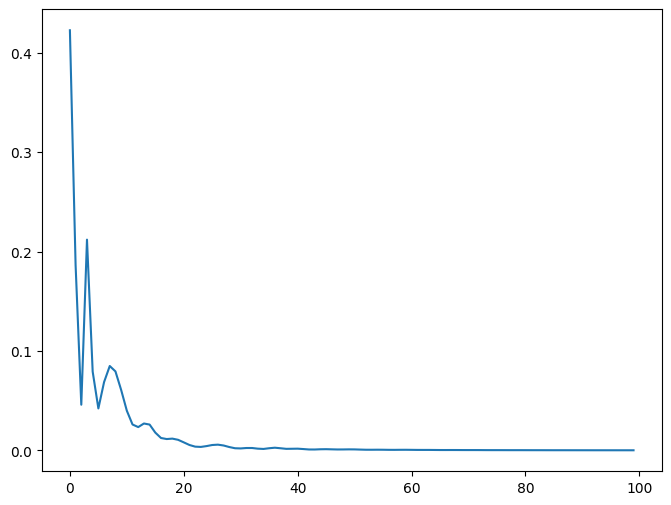

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(hist, label="training loss")


We have applied scaler transformation on df with 5 columns. Now we want to unscale our closing price both actual and predicted. Hence we need to create a numpy array with 5 columns for unscaling and then extract out our required column from that

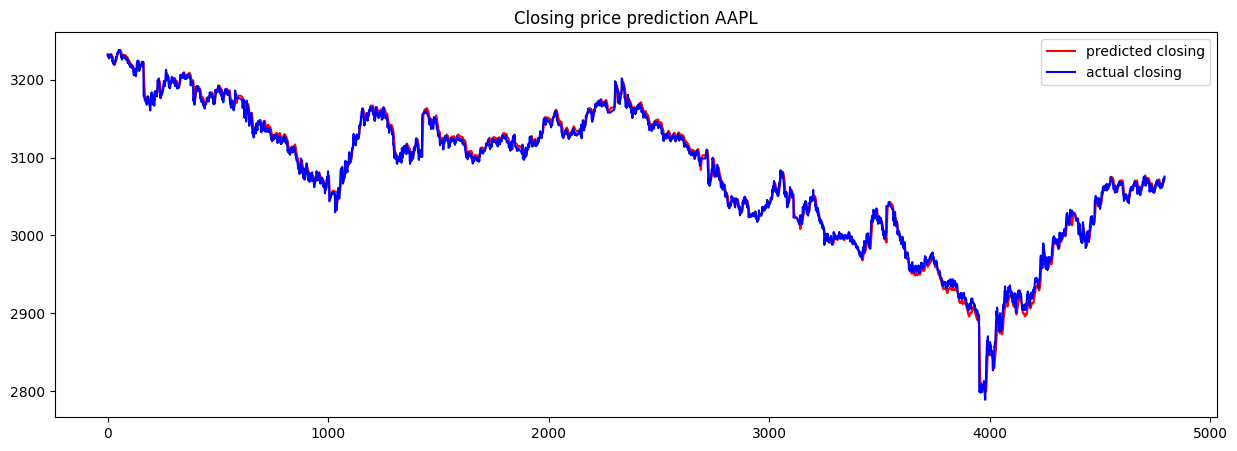

In [ ]:
def unscale_predictions(y):

    y_numpy = y.detach().numpy().reshape(-1)
    y_dummy = np.zeros([y.shape[0],5])
    y_dummy[:,0] = y_numpy
    y_pred = scaler.inverse_transform(y_dummy)
    return y_pred[:,0]

y_test_pred = model(x_test)

close_pred = unscale_predictions(y_test_pred)
close_actual = unscale_predictions(y_test)


plt.figure(figsize=(15,5))
plt.plot(close_pred, color = 'red', label ='predicted closing')
plt.plot(close_actual, color = 'blue', label ='actual closing')
plt.title('Closing price prediction AAPL')
plt.legend()
plt.show()

In [ ]:
RMSE=np.sqrt(np.mean((close_pred-close_actual)**2))
RMSE

7.161934330610153

Building the momentum trading strategy

In [ ]:
tr=close_pred
tr=pd.DataFrame(tr)
tr.columns=["close"]

Building the trading strategy


In [ ]:
def SMA(data,window):
  return data["close"].rolling(window).mean()

def EMA(data,window):
  return data["close"].ewm(window).mean()

def generate_signal(data):
  data["MA_Short"]=EMA(data,5)
  data["MA_Long"]=EMA(data,20)

  data["Signal"]=np.where(data["MA_Short"]>data["MA_Long"],1,0)
  data["Position"]=data["Signal"].diff()
  return data

In [ ]:
def buy_sell_signal(data):
  data["buy"]=np.where(data["Position"]==1,data["MA_Short"],np.nan)
  data["sell"]=np.where(data["Position"]==-1,data["MA_Long"],np.nan)

  return data

def plot_signals(data):
  plt.figure(figsize=(15,8))
  #plt.plot(data["close"],label="close")
  plt.plot(data["MA_Short"],label="MA_Short")
  plt.plot(data["MA_Long"],label="MA_Long")
  plt.scatter(data.index,data["buy"],label="buy",marker="^",color="green")
  plt.scatter(data.index,data["sell"],label="sell",marker="v",color="red")
  plt.legend()
  plt.show()

In [ ]:
tr=generate_signal(tr)
tr=buy_sell_signal(tr)

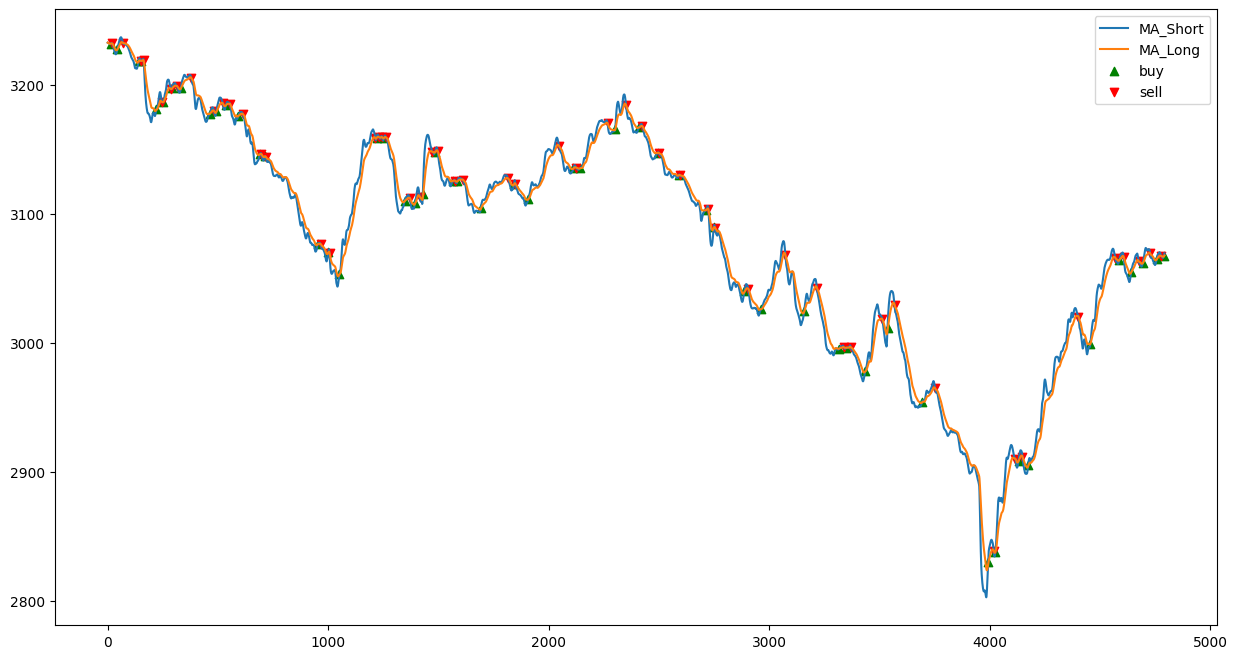

In [ ]:
plot_signals(tr)

In [ ]:
def portfolio_performance(df, initial_investment=100000):
    df['Portfolio_Value'] = initial_investment
    shares = 0
    for i in range(1, len(df)):
        if df['Position'].iloc[i] == 1:  # Buy signal
            shares = df['Portfolio_Value'].iloc[i - 1] / df['close'].iloc[i]
            df['Portfolio_Value'].iloc[i] = shares * df['close'].iloc[i]
        elif df['Position'].iloc[i] == -1:  # Sell signal
            df['Portfolio_Value'].iloc[i] = shares * df['close'].iloc[i]
            shares = 0
        else:  # Hold
            if shares > 0:
                df['Portfolio_Value'].iloc[i] = shares * df['close'].iloc[i]
            else:
                df['Portfolio_Value'].iloc[i] = df['Portfolio_Value'].iloc[i - 1]

    overall_return = df['Portfolio_Value'].iloc[-1] - initial_investment
    return df, overall_return

In [ ]:
df,overall_return=portfolio_performance(tr)

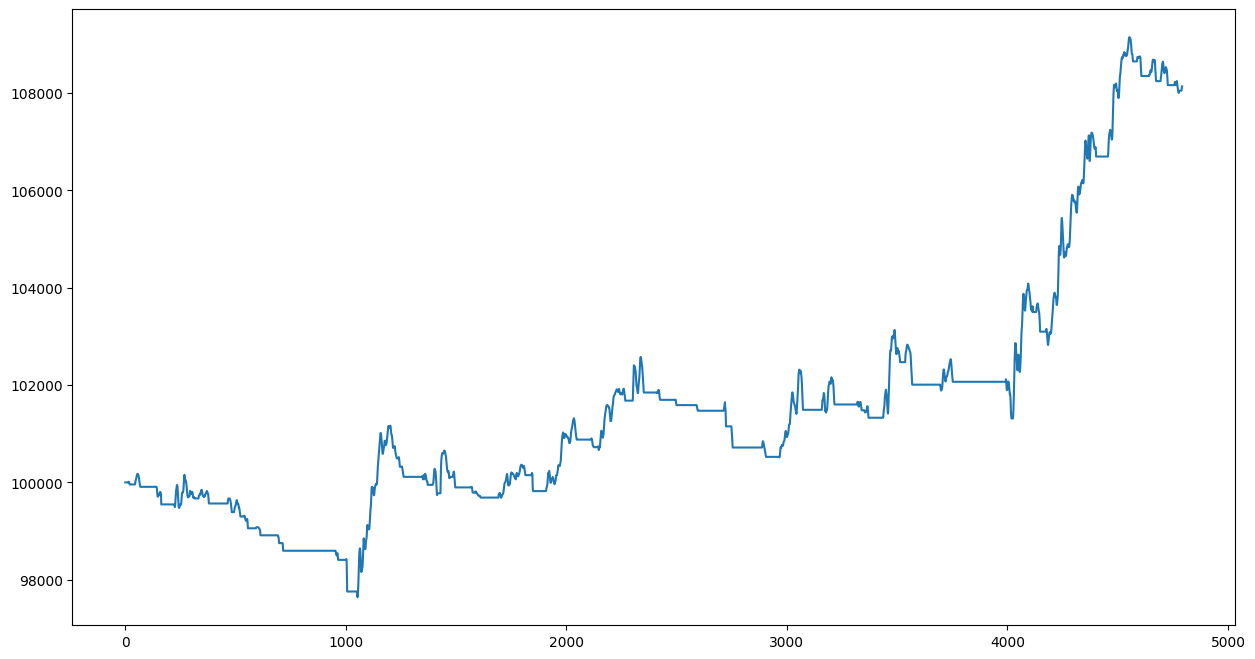

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df["Portfolio_Value"])

In [ ]:
return_pct= (df['Portfolio_Value'].iloc[-1] - 100000)/100000 *100
print(f"Percentage return: {return_pct}%")

Percentage return: 8.13760754419306%
